In [ ]:
# Hypothesis Testing
# 6: Over time, teams of collaborating authors of a publication do not become more diverse in terms of gender. % see before, do the same but by year

In [1]:
# >>> Preparation
import pandas

In [2]:
print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown',
]

publs = pandas.read_csv("data/publications_cor3.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:5]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                                                  key  \
key                                                                    
books/acm/0082477                                  books/acm/0082477   
books/acm/Kim95                                      books/acm/Kim95   
books/acm/kim95/AnnevelinkACFHK95  books/acm/kim95/AnnevelinkACFHK95   
books/acm/kim95/Blakeley95                books/acm/kim95/Blakeley95   
books/acm/kim95/BreitbartGS95          books/acm/kim95/BreitbartGS95   

                                        pub_cat pub_type  \
key                                                        
books/acm/0082477                          book      NaN   
books/acm/Kim95                            book      NaN   
books/acm/kim95/AnnevelinkACFHK95  incollection      NaN   
books/acm/kim95/Blakeley95         incollection      NaN   
books/acm/kim95/BreitbartGS95      incollection      NaN   

                              

In [3]:
# Create dataset of publications by year
publs_by_year_group = publs.groupby("year")

# How many contributions by year?
publs_sum_by_year = publs_by_year_group.count()

In [4]:
# Find out the minimum and maximum valid year:
min_year = publs_sum_by_year[publs_sum_by_year['key'] > 1000].index.values.min() # 1966
max_year = 2018 # To Adjust: We only have 4 months of 2019 with the dataset of April 2019

In [5]:
publs_lim = publs[(publs['year'] >= min_year) & (publs['year'] <= max_year)]

In [ ]:
###

In [6]:
# >>> Calculation
from scipy import stats
print("Calculating Spearman's Correlation Coefficient...")
publs_lim_cor = stats.spearmanr(publs_lim["year"], publs_lim["n_males"])
print("Done!")
print(publs_lim_cor)
# p value can not be trusted since 53 observations < 500: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html

Calculating Spearman's Correlation Coefficient...
Done!
SpearmanrResult(correlation=0.05561626974403582, pvalue=0.0)


In [7]:
print("Calculating Spearman's Correlation Coefficient...")
publs_lim_cor = stats.spearmanr(publs_lim["year"], publs_lim["n_females"])
print("Done!")
print(publs_lim_cor)

Calculating Spearman's Correlation Coefficient...
Done!
SpearmanrResult(correlation=0.06302916152381688, pvalue=0.0)


In [8]:
print("Calculating Spearman's Correlation Coefficient...")
publs_lim_cor = stats.spearmanr(publs_lim["year"], publs_lim["n_unknown"])
print("Done!")
print(publs_lim_cor)

Calculating Spearman's Correlation Coefficient...
Done!
SpearmanrResult(correlation=0.21328187890552577, pvalue=0.0)


In [9]:
print("Calculating Spearman's Correlation Coefficient...")
publs_lim_cor = stats.spearmanr(publs_lim["year"], publs_lim["n_authors"])
print("Done!")
print(publs_lim_cor)

Calculating Spearman's Correlation Coefficient...
Done!
SpearmanrResult(correlation=0.28436497975585034, pvalue=0.0)


In [10]:
print("Calculating Spearman's Correlation Coefficient...")
publs_lim_cor = stats.spearmanr(publs_lim["year"], publs_lim["ratio"])
print("Done!")
print(publs_lim_cor)

Calculating Spearman's Correlation Coefficient...
Done!
SpearmanrResult(correlation=-0.0588231473392378, pvalue=0.0)


In [ ]:
# test if for r < 0 year grows & for r > 0 year schrinks

Text(0.5, 1.0, 'Gender Inequality Index per year (1966 - 2018)')

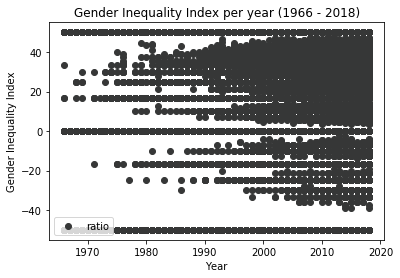

In [12]:
# >>> Visualization
import matplotlib.pyplot as plt
plt.scatter(publs_lim["year"], publs_lim["ratio"], color="xkcd:dark grey")

plt.xlabel("Year")
plt.ylabel("Gender Inequality Index")
plt.legend()
plt.title("Gender Inequality Index per year (1966 - 2018)")

In [ ]:
# >>> Interpretation:
# The hypothesis is rejected. The share of (contributions made by) female authors grows slightly.